# Uber Data Analysis Wth Python


##  **By:-** **Himanshu Dwivedi**
 **Date:-**  24/08/2022

**Uber Technologies, Inc.,** commonly known as **Uber** is An American Technology company. It's services include ride-halling food delivery, package delivery, couriers, freight transportation, and through a partnership with Lime, electric bicycle and motorized scooter rental.

We will use **Python** to:
 * Check long do people travel with Uber?
 * What hour Do most people take Uber to their destination?
 * Check the purpose of the trips
 * Which day has highhest no. of trips?
 * What are the number of trips per each day?
 * What are the trips in a month?
 * The starting points of trips. Where do people Start Boarding their Trip from Most?

# IMPORT

## Importing Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [70]:
df=pd.read_csv("Uber Drives.csv")

There are **1156** rows and **7** columns.

# EXPLORE

##  Exploring Data

In [71]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [73]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## Checking Missing Values

In [74]:
df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [75]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

**PURPOSE** column has more than **500** null values.
Let's explore more about "PURPOSE"

In [76]:
df["PURPOSE*"].nunique()

10

In [77]:
df["PURPOSE*"].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

We can see that if we will gain insight using data in PURPOSE column , our insights will be biased.
So either we sholud try for filling those NaN values or drop those rows.(Dropping that amout of rows will affect our analysis)

## Dropping Missing Values

In [78]:
df.dropna(inplace=True)
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [79]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [80]:
df.shape

(653, 7)

By droping null values. Our row size is reduced to **653** rows from **1156**.

## Converting Datatypes

Starting date & End Date are in **Object** format so we will convert them to **DateTime** format.

In [81]:
df["START_DATE*"] = pd.to_datetime(df['START_DATE*'],format='%m/%d/%Y %H:%M')
df["END_DATE*"] = pd.to_datetime(df["END_DATE*"], format= "%m/%d/%Y %H:%M") 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


## Creating New Columns

In [83]:
hour = []
date = []
month = []
weekday = []
dayofweek = []
for x in df["START_DATE*"]:
    hour.append(x.hour)
    date.append(x.day)
    month.append(x.month)
    dayofweek.append(x.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df["HOUR"]= hour
df["DAY"] = date
df["MONTH"] = month
df["WEEK_DAY"] = weekday
df["DAY_OF_WEEK"] = dayofweek

In [84]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEK_DAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5


###  *Categories of Rides We Have:*

In [87]:
df["CATEGORY*"].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

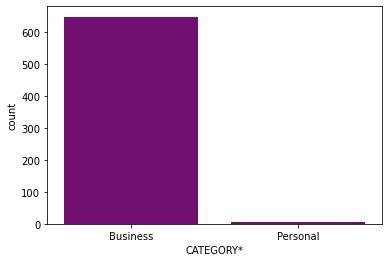

In [131]:
sns.countplot(x='CATEGORY*',color="purple",data = df);

###  *How long do people travel with Uber?*

Text(0.5, 1.0, 'Distribution of Miles Travelled')

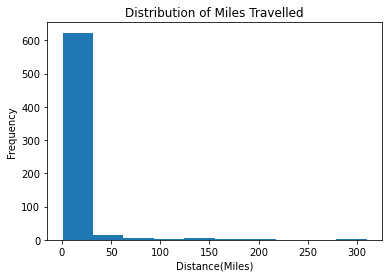

In [97]:
plt.hist(df["MILES*"]);
plt.xlabel("Distance(Miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Miles Travelled")

We can see most people prefer Uber for short distances only.

### *At what hour do most People Take Uber To Their Destination?*

In [115]:
df["HOUR"].describe()

count    653.00000
mean      14.82389
std        4.81733
min        0.00000
25%       12.00000
50%       15.00000
75%       18.00000
max       23.00000
Name: HOUR, dtype: float64

Text(0.5, 1.0, 'Number of Trips Vs Hours')

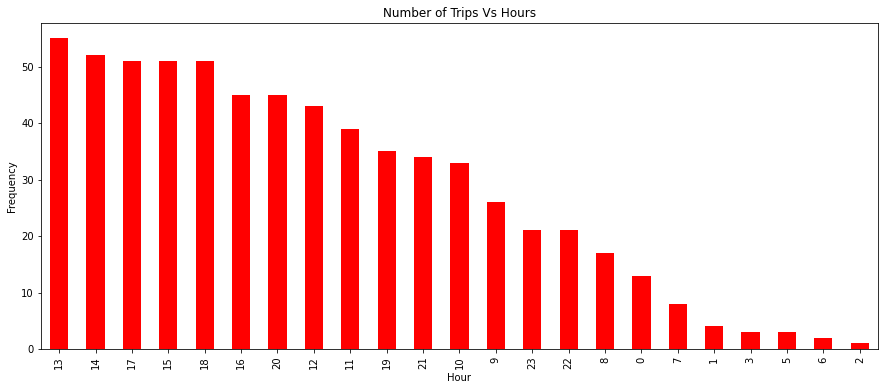

In [113]:
df["HOUR"].value_counts().plot(kind="bar",color="red",figsize=(15,6))
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Number of Trips Vs Hours")


Most Bookings are done between **1PM - 4PM**. And Least number of rides booked is between **1AM - 2AM**

### *Purpose Of Trips?*

In [116]:
df["PURPOSE*"].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

Text(0.5, 1.0, 'Frquency of Purpose')

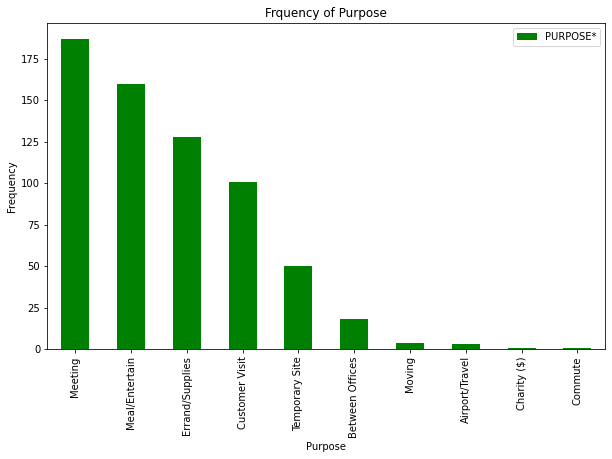

In [129]:
df["PURPOSE*"].value_counts().plot(kind="bar",color="Green",figsize=(10,6), legend=True)
plt.xlabel("Purpose")
plt.ylabel("Frequency")
plt.title("Frquency of Purpose")


We can see most of the rides booked for the purpose of **Meeting.**

### *Which day has the Highest Number of Trips?*

Text(0.5, 1.0, 'Numer of Trips Vs Weekday')

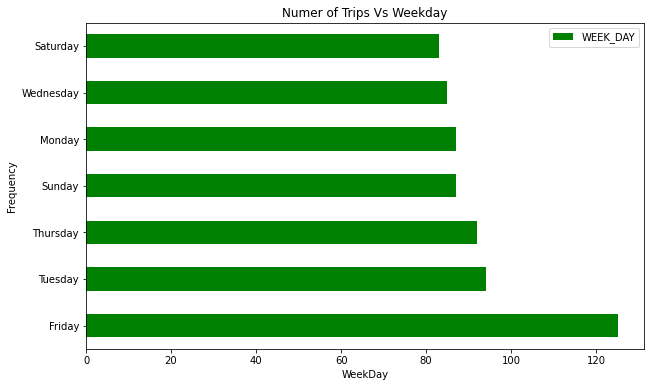

In [128]:
df["WEEK_DAY"].value_counts().plot(kind="barh",color="Green",figsize=(10,6), legend=True)
plt.xlabel("WeekDay")
plt.ylabel("Frequency")
plt.title("Numer of Trips Vs Weekday")


**Friday** is the most booked day of the week.

### *What are the number of Trips Each Day?*

Text(0.5, 1.0, 'Numer of Trips Vs Day')

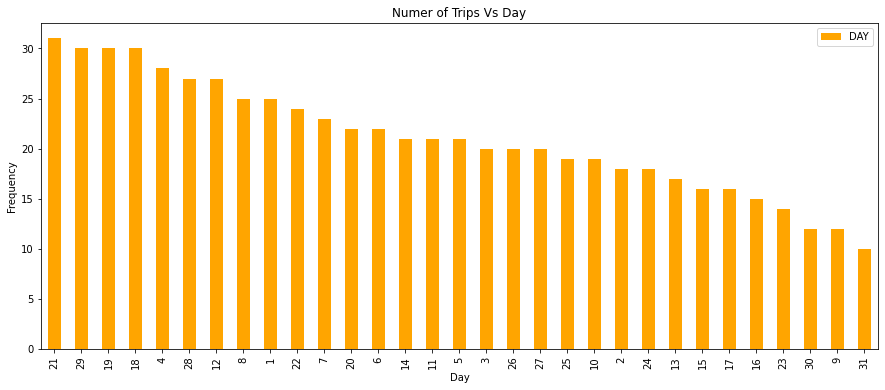

In [126]:
df["DAY"].value_counts().plot(kind="bar",color="orange",figsize=(15,6), legend=True)
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Numer of Trips Vs Day")

**21** Is the busiest day of month. Also its a thing to notice that even 29th has high number of bookings, there is a sudden drastic drop on next 2 days after 29th

### *What are the Trips in a Month?*

Text(0.5, 1.0, 'Numer of Trips Vs months')

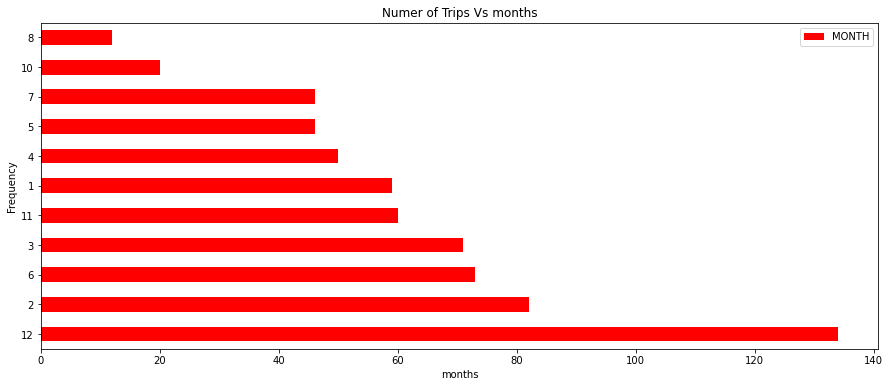

In [133]:
df["MONTH"].value_counts().plot(kind="barh",color="red",figsize=(15,6), legend=True)
plt.xlabel("months")
plt.ylabel("Frequency")
plt.title("Numer of Trips Vs months")

**December** month has highest rate of uber rides.

### *Where do People start boarding their Trip from Most?*

Text(0.5, 1.0, 'Numer of Trips Vs Starting Point')

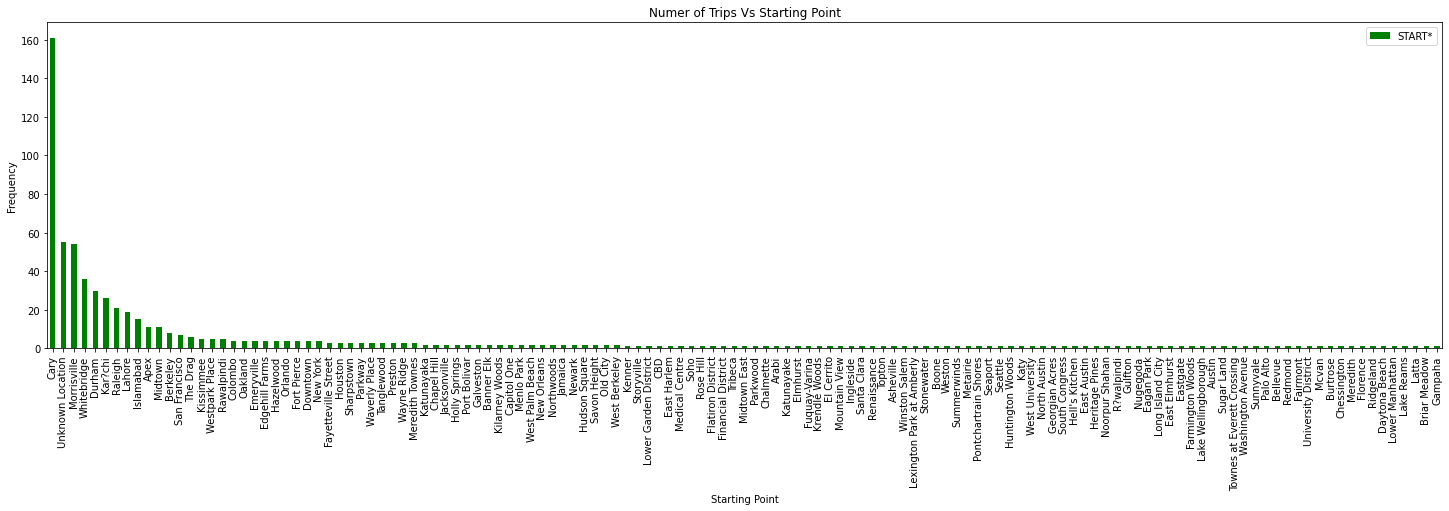

In [140]:
df["START*"].value_counts().plot(kind="bar",color="green",figsize=(25,6), legend=True)
plt.xlabel("Starting Point")
plt.ylabel("Frequency")
plt.title("Numer of Trips Vs Starting Point")

**Cary** is the most preferred starting point.

## **Key Takeaways**

* Starting point of maximum rides is **Cary**.
* **December** is most booked month for Uber rides.
* **Friday** is busiest among the week days.
* **21st** day of every month is usually seeing increase in rides.

## **Recommendations**

* More data should be collected for better analysis.
* Sample size should be increased.
* Destination of all rides should also be added for a clearer picture.
* This dataset contained vast amount of null values, wich affected our analysis. To prevent this we should encourage people to input Purpose of there rides.
* We should check out why people are not booking rides at certain places.
* We can increse the presence of rides at night time by rewarding customers or by giving them discounts.
